In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from mpl_toolkits.mplot3d import Axes3D
from numpy import where

In [2]:
data = pd.read_csv('jonty_data.csv',encoding= 'unicode_escape')

In [3]:
data

,latitude,longitude,Sum of load,cities
0,102.003965,36.406412,3194,Shagou
1,103.078562,26.139329,13939,Tangdan
2,109.423580,32.902077,1261,Gouyuan
3,109.744661,26.215115,3122,Jingwuzhou
4,112.407126,34.689694,8919,Xigong District
...,...,...,...,...
948,121.431115,31.157151,40,Xuhui District
949,121.431151,31.007327,2588,Minhang District
950,121.431225,31.176050,1312,Xuhui District
951,121.431404,31.174203,1372,Xuhui District


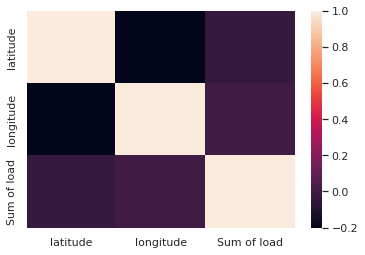

In [4]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [5]:
data.isnull().sum()

latitude       0
longitude      0
Sum of load    0
cities         0
dtype: int64

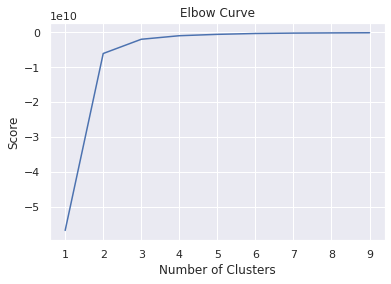

In [3]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = data[['Sum of load']]
X_axis = data[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [4]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(data[data.columns[1:3]]) # Compute k-means clustering.
data['cluster_label'] = kmeans.fit_predict(data[data.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(data[data.columns[1:3]]) # Labels of each point
data.head(10)

,latitude,longitude,Sum of load,cities,cluster_label
0,102.003965,36.406412,3194,Shagou,0
1,103.078562,26.139329,13939,Tangdan,2
2,109.423580,32.902077,1261,Gouyuan,3
3,109.744661,26.215115,3122,Jingwuzhou,0
4,112.407126,34.689694,8919,Xigong District,2
5,113.276351,35.241160,273,Shanyang District,3
6,114.484137,38.052584,3823,Xinhua District,0
7,115.023159,29.263844,5508,Futian,0
8,116.072359,35.379598,13465,Juye County,2
9,116.090395,34.798608,134,Heze City,3


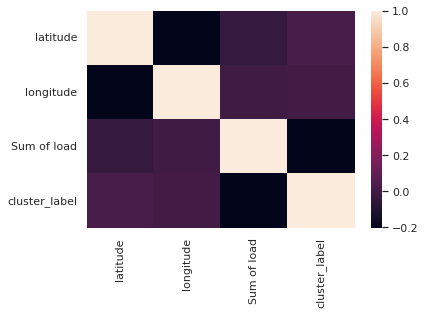

In [5]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [8]:
data.groupby('cluster_label')['cluster_label'].count()

cluster_label
0    629
1      1
2     65
3    258
Name: cluster_label, dtype: int64

In [11]:
clus1=[]
clus2=[]
clus3=[]
for i in range(len(data)):
  if(data.loc[i,'cluster_label']==0):
    clus1.append(data.loc[i,'cities'])
  elif(data.loc[i,'cluster_label']==1):
    clus2.append(data.loc[i,'cities'])
  else:
    clus3.append(data.loc[i,'cities'])

In [12]:
set(clus3)

{'Baoshan District',
 'Changning District',
 'Donghai County',
 'Fengjing',
 'Fengxian District',
 'Gouyuan',
 'Gusu District',
 'Haining',
 'Hexi District',
 'Heze City',
 'Jiading District',
 "Jing'an District",
 'Jinhua',
 'Jinshan District',
 'Juye County',
 'Kunshan',
 'Lianyun District',
 'Lunan District',
 'Lüxiang',
 'Minhang District',
 'Pinghu',
 'Putuo District',
 'Qingpu District',
 'Shanyang District',
 'Songjiang District',
 'Taicang',
 'Tangdan',
 'Xianju County',
 'Xigong District',
 'Xuhui District',
 'Yanshi',
 'Zhujing'}

In [12]:
pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 12.7 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
     |████████████████████████████████| 219 kB 84.9 MB/s 
     |████████████████████████████████| 6.3 MB 54.5 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=9070776b4a7be94efcd8aa3bd46256bca6ec3f732ae8f0435035ef23bbc869ef
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


         latitude     longitude  Sum of load            cities  cluster_label
1    1.859899e-51  4.716452e-52        13939           Tangdan              2
4    2.028219e-51  6.259238e-52         8919   Xigong District              2
6    2.065696e-51  6.866022e-52         3823   Xinhua District              2
7    2.075422e-51  5.280225e-52         5508            Futian              2
8    2.094353e-51  6.383721e-52        13465       Juye County              2
..            ...           ...          ...               ...            ...
891  2.190881e-51  5.607705e-52         7576  Minhang District              2
916  2.190964e-51  5.622770e-52         4180    Xuhui District              2
918  2.190968e-51  5.615269e-52         4630  Minhang District              2
919  2.190976e-51  5.599502e-52         5996  Minhang District              2
923  2.190984e-51  5.656355e-52        11966  Baoshan District              2

[165 rows x 5 columns]


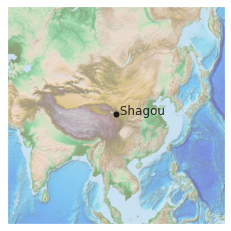

In [216]:
from mpl_toolkits.basemap import Basemap
locdf = pd.DataFrame()
locdf=data.loc[data['cluster_label'] == 2]
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=36, lon_0=102,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(	102.003965, 36.406412)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Shagou', fontsize=12);


print(locdf)

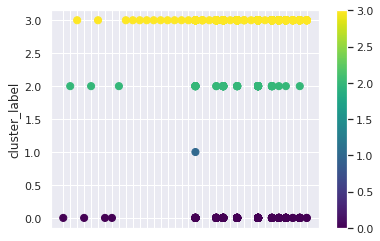

In [20]:
data.plot.scatter(x='cities',y='cluster_label',c=labels,s=50,cmap='viridis')
#plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.7)

In [21]:
data[['latitude','longitude']]

,latitude,longitude
0,102.003965,36.406412
1,103.078562,26.139329
2,109.423580,32.902077
3,109.744661,26.215115
4,112.407126,34.689694
...,...,...
948,121.431115,31.157151
949,121.431151,31.007327
950,121.431225,31.176050
951,121.431404,31.174203


In [7]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_model = data.copy()
features = [['longitude','latitude']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
X=pd.concat([df_model['latitude'],df_model['longitude']],axis=1)
y=df_model['cluster_label']

In [23]:
df_model[['latitude','longitude']]

,latitude,longitude
0,-114.156951,22.875984
1,-107.809469,-22.013326
2,-70.330406,7.554477
3,-68.433829,-21.681978
4,-52.707050,15.370221
...,...,...
948,0.596290,-0.074615
949,0.596503,-0.729669
950,0.596940,0.008014
951,0.597998,-0.000061


Text(0.5, 1.0, 'After Robust Scaling')

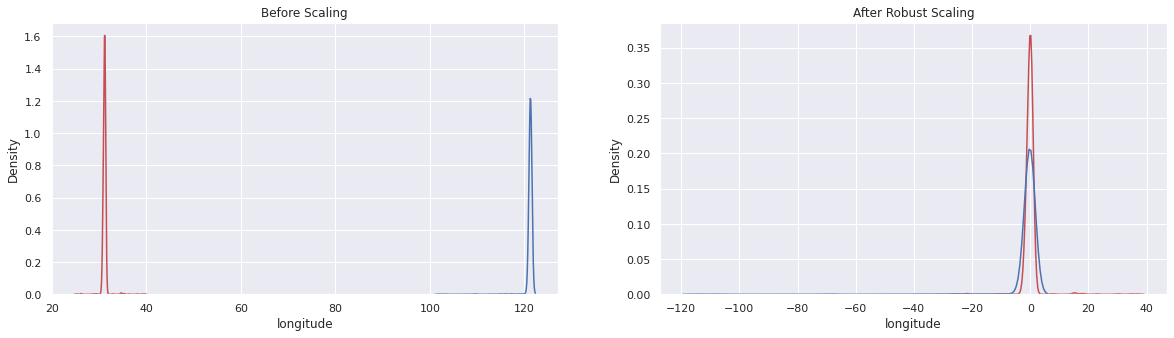

In [8]:
import seaborn as sns 
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(20, 5))
sns.kdeplot(data['longitude'], ax = ax1, color ='r')
sns.kdeplot(data['latitude'], ax = ax1, color ='b')
ax1.set_title('Before Scaling')
sns.kdeplot(df_model['longitude'], ax = ax2, color ='r')
sns.kdeplot(df_model['latitude'], ax = ax2, color ='b')
ax2.set_title('After Robust Scaling')

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import scipy as sp

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
neigh = KNeighborsClassifier(n_neighbors=18)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [11]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    pred_i=clf.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))


In [40]:
error_rate[:8]

[0.42857142857142855,
 0.3619047619047619,
 0.4,
 0.3619047619047619,
 0.38095238095238093,
 0.3523809523809524,
 0.3396825396825397,
 0.3523809523809524]

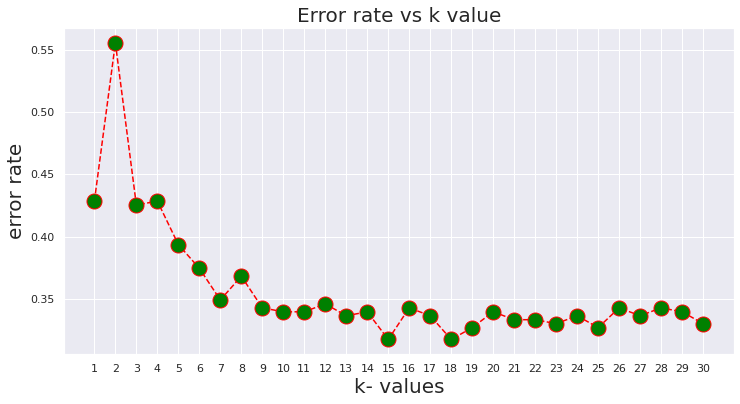

In [12]:
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

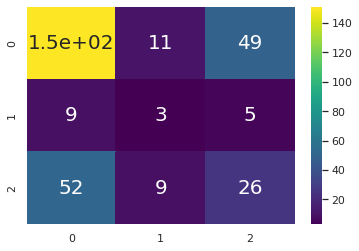

In [33]:
from sklearn.metrics import confusion_matrix
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
predicted_value=clf.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
plt.show()

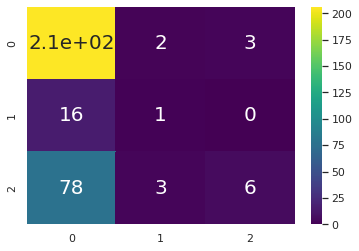

In [32]:
clf=KNeighborsClassifier(n_neighbors=18)
clf.fit(X_train,y_train)
predicted_value=clf.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
plt.show()

In [13]:
predVal=neigh.predict(X_test)
mat=[predVal,y_test]
df=pd.DataFrame(mat).transpose()
df.columns=('h0','y')
df['diff']=np.where(df.h0==df.y,1,0)
print('% correct =',sum(df['diff'])/len(df['diff'])*100)

% correct = 68.25396825396825


In [14]:
accbig=[]
def f(x):
    return sp.log(sp.maximum(sp.minimum(x,1-10**-5),10**-5))
f=np.vectorize(f)

for j in range(3,30,2):
    acc=[]
    for i in range(46):
        #split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
        neigh = KNeighborsClassifier(n_neighbors=j)
        #train classifier
        neigh.fit(X_train, y_train)
        
        #find % predicted correctly for this k
        predVal=neigh.predict(X_test)
        mat=[predVal,y_test]
        df=pd.DataFrame(mat).transpose()
        df.columns=('h0','y')
        df['diff']=np.where(df.h0==df.y,1,0)
        acc.append(sum(df['diff'])/len(df['diff']))
    accbig.append(np.mean(acc))

Text(0.5, 1.0, 'KNN prediction on longitude and latitude')

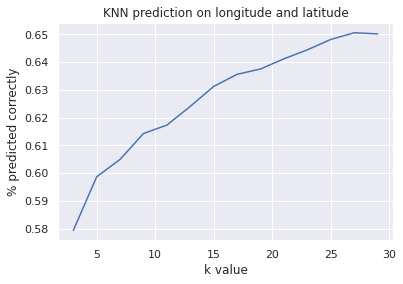

In [15]:
plt.plot(range(3,30,2),accbig)
plt.ylabel('% predicted correctly')
plt.xlabel('k value')
plt.title('KNN prediction on longitude and latitude')